<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div> 
<div style="float:right;"><a href="../B/B.html"><img src="../data/B_nav.png" width="100" style="float:right;" alt="B"></a></div>
<div ><h1> Multimedia</h1> </div>
</div>

<br/>

<p>
In this notebook, we give a short overview on how to integrate multimedia objects (in particular, audio, image, and video objects) into a Jupyter notebook. Rather than being comprehensive, we only give a selection of possibilities as used in the other FMP notebooks. In particular, we discuss two alternatives: a direct integration of images, video, and audio elements using HTML tags as well as an integration using the module <code>IPython.display</code>.
</p>

## Audio Objects

### Audio: HTML `<audio>` tag

The HTML `<audio>` tag defines an in-browser audio player and allows for playing back a specified audio file (MP3, WAV, OGG), see [here](https://www.w3schools.com/Tags/tag_audio.asp) for details. Note that the functionality and the visual appearance of the audio player depends on the respective browser used. The `<audio>` tag can be used within a markdown cell and does not require any Python. 

<audio src="../data/B/FMP_B_Note-C4_Piano.mp3" type="audio/mpeg" controls="controls"></audio>

### Audio: Using  <code>IPython.display.Audio</code>

An alternative is to use the module <code>IPython.display</code>, which is an application programming interface (API) for displaying various tools in IPython. As for audio, the following class is available ([`IPython` version 6.0 or higher](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)):

`IPython.display.Audio(data=None, filename=None, url=None, embed=None, rate=None, autoplay=False, normalize=True, *, element_id=None)`

<div class="alert alert-block alert-warning">
<strong>Warning:</strong> As default, <code>IPython.display.Audio</code> normalizes the audio (dividing by the maximum over all sample values) before playback. This may be unwanted for certain applications, where the volume of the audio should be kept to its original level. For examples, see the <a href="../B/B_PythonAudio.html">FMP notebook on Audio</a>.
</div> 

When used in a code cell, <code>IPython.display.audio</code> creates an in-browser audio player. The following two options are conceptually different: 

* When using the keyword argument `filename`, the audio file is loaded from the specified path and **embedded** into the notebook (with default `embed=True`). 
* When using the keyword argument `url`, the player is **linked** to the audio file by the specified URL (with default `embed=False`). 

Note that if you want the audio to be playable later with no internet connection (or with no local audio file available), you need to embed the audio file into the notebook. This can be done using the first option. The following example illustrates the difference between the two options. 

In [1]:
import os
import IPython.display as ipd
import librosa
import numpy as np
%matplotlib inline

path_filename = os.path.join('..', 'data', 'B', 'FMP_B_Note-C4_Piano.mp3')

audio_element_filename = ipd.Audio(filename=path_filename)
print('Size of <audio> tag (with embedded audio file): %s Bytes' 
      % len(audio_element_filename._repr_html_().encode('utf8')), flush=True)
ipd.display(audio_element_filename)

audio_element_url = ipd.Audio(url=path_filename)
print('Size of <audio> tag (with linked audio file): %s Bytes' 
      % len(audio_element_url._repr_html_().encode('utf8')), flush=True)
ipd.display(audio_element_url)

Size of <audio> tag (with embedded audio file): 22910 Bytes


Size of <audio> tag (with linked audio file): 244 Bytes


### Audio: WAV and MP3

Embedding audio files may lead to very large Jupyter notebooks (also large files when exported as HTML). This particularly holds when embedding raw audio files encoded as WAV file. For example, encoding a song of five to ten minutes in CD quality (44100 Hz, stereo), may easily lead to a file size of more than 50 MB. Therefore, to reduce the size, one may consider the following:

* Trim audio files to have short durations.
* Reduce the sampling rate.
* Convert to mono. 
* Use the MP3 audio coding format.

The following example shows the difference in file size of a WAV and MP3 audio file.

In [2]:
path_filename_wav = os.path.join('..', 'data', 'B', 'FMP_B_Note-C4_Piano.wav')
audio_element_wav = ipd.Audio(filename=path_filename_wav)
print('Size of <audio> tag (with embedded WAV file): %s Bytes' 
      % len(audio_element_wav._repr_html_().encode('utf8')), flush=True)
ipd.display(audio_element_wav)

path_filename_mp3 = os.path.join('..', 'data', 'B', 'FMP_B_Note-C4_Piano.mp3')
audio_element_mp3 = ipd.Audio(filename=path_filename_mp3)
print('Size of <audio> tag (with embedded MP3 file): %s Bytes' 
      % len(audio_element_mp3._repr_html_().encode('utf8')), flush=True)
ipd.display(audio_element_mp3)

Size of <audio> tag (with embedded WAV file): 121640 Bytes


Size of <audio> tag (with embedded MP3 file): 22910 Bytes


### Audio: Waveform-Based Signals

One may also use `IPython.display.Audio` to embed waveform-based audio signals (either mono or stereo). The following code example shows how to read a WAV and MP3 file using the Python package `librosa`. Note that in both cases, the audio files are converted into waveform representations.

In [3]:
x_wav, Fs_wav = librosa.load(path_filename_wav, sr=None)
audio_wav = ipd.Audio(data=x_wav, rate=Fs_wav)
print('Size of <audio> tag (coming from WAV): %s Bytes'
      % len(audio_wav._repr_html_().encode('utf8')), flush=True)
ipd.display(audio_wav)

x_mp3, Fs_mp3 = librosa.load(path_filename_mp3, sr=None)
audio_mp3 = ipd.Audio(data=x_mp3, rate=Fs_mp3)
print('Size of <audio> tag (coming from MP3): %s Bytes' 
      % len(audio_mp3._repr_html_().encode('utf8')), flush=True)
ipd.display(audio_mp3)

Size of <audio> tag (coming from WAV): 121636 Bytes


Size of <audio> tag (coming from MP3): 126244 Bytes


/Users/zal/miniconda3/envs/FMP/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The next example shows how to generate a stereo audio signal and how to embed it into the Jupyter notebook. For explanations of the code example, we refer to the [FMP notebook on waveforms](../C1/C1S3_Waveform.html).

<div class="alert alert-block alert-warning">
<strong>Warning:</strong> Depending on the web browser, only specific sampling rates may be supported for audio playback. In the following example, we use the sampling rate <code>Fs = 4000</code>, which seems to work for most browsers. 
</div> 

In [4]:
Fs = 4000
duration = 4
t = np.linspace(0, duration, Fs * duration)
signal_left = np.sin(2 * np.pi * 200 * t)
signal_right = np.sin(2 * np.pi * 600 * t)
signal_stereo = [signal_left, signal_right]
ipd.Audio(signal_stereo, rate=Fs)

## Image Objects

### Image: HTML `<img>` tag

Similar to audio, there are many ways to integrate image objects into a Jupyter notebook. First of all, one can use the [`<img>` tag](https://www.w3schools.com/Tags/tag_img.asp) within a markdown cell without requring any Python. The following figure shows a self-similarity matrix (SSM) of a recording of Brahms' Hungarian Dance No. 5, see Section 4.2.2 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015].</a>

<img src="../data/B/FMP_B_Brahms-SSM.png" width="300px" align="middle" alt="C0">

HTML also allows for showing animated GIFs. This simple format encodes a number of images or frames, which are presented in a specific order to create a short animation. Using animated GIFs is a nice way to illustrate processing pipelines. For example, the following animated GIF shows the previous SSM in its original form along with a version after applying smoothing as well as thresholding and scaling.

<img src="../data/B/FMP_B_Brahms-SSM.gif" width="300px" alt="SSM">

### Image: Using  <code>IPython.display.Image</code>

Similar to the the audio case, an alternative is to use the module <code>IPython.display</code> to create an image given the path to a PNG/JPEG/GIF file. As for images, the following class is available:

`IPython.display.Image(data=None, url=None, filename=None, format=None, embed=None, width=None, height=None, retina=False, unconfined=False, metadata=None)`

Again, there are two options, which either embed or link an image object:

* When using the keyword argument `filename`, the image file is loaded from the specified path and **embedded** into the notebook (with default `embed=True`). 
* When using the keyword argument `url`, the data is **linked** by the specified URL (with default `embed=False`). 

Here are some examples:

 <img> tag with embedded image file:


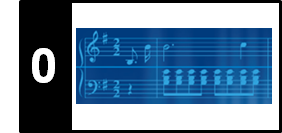

 <img> tag with linked image file:


In [5]:
path_filename = os.path.join('..', 'data', 'B', 'FMP_B_Chapters_C0_nav.png')

print(' <img> tag with embedded image file:', flush=True)
ipd.display(ipd.Image(filename=path_filename, width=100))

print(' <img> tag with linked image file:', flush=True)
ipd.display(ipd.Image(url=path_filename, width=100))

### Image: Display Side by Side

Sometimes, one may want to display several images in a row (rather than having them displayed from top to down). One convenient way is to use the [Python library `pandas`](https://pandas.pydata.org/), which provides easy-to-use data structures and data analysis tools.

In [6]:
import os
import pandas as pd
import IPython.display as ipd

pd.set_option('display.max_colwidth', None)

f_img1 = os.path.join('..', 'data', 'B', 'FMP_B_Chapters_C0_nav.png')
f_img2 = os.path.join('..', 'data', 'B', 'FMP_B_Chapters_C1_nav.png')
f_img3 = os.path.join('..', 'data', 'B', 'FMP_B_Chapters_C2_nav.png')
f_img4 = os.path.join('..', 'data', 'B', 'FMP_B_Chapters.gif')

img1 = ipd.Image(url=f_img1, width=100)._repr_html_()
img2 = ipd.Image(url=f_img2, width=100)._repr_html_()
img3 = ipd.Image(url=f_img3, width=100)._repr_html_()
img4 = ipd.Image(url=f_img4, width=100)._repr_html_()

# Generation of two-dimensional tabular data structure (with rows and columns)
df = pd.DataFrame({'images': [img1, img2, img3, img4]})
print(df)

# Rendering of a DataFrame as an HTML table
ipd.display(ipd.HTML(df.T.to_html(escape=False, header=False, index=False)))

                                                         images
0  <img src="../data/B/FMP_B_Chapters_C0_nav.png" width="100"/>
1  <img src="../data/B/FMP_B_Chapters_C1_nav.png" width="100"/>
2  <img src="../data/B/FMP_B_Chapters_C2_nav.png" width="100"/>
3         <img src="../data/B/FMP_B_Chapters.gif" width="100"/>


,,,


### Image: Generation and Interaction 

There are many ways to generate (interactive) images using Python and to integrate them into a Jupyter notebook. The [FMP notebook on python visualization](../B/B_PythonVisualization.html) is devoted to this topic.

## Video Objects

### Video: HTML `<video>` tag

Finally, we discuss how to integrate videos into a Jupyter notebook. First of all, one can use the `<video>` tag within a markdown cell without requiring any Python. The following figure shows a video for a user interface (Interpretation Switcher) that facilitates music navigation across different performances of Beethoven's Fifth Symphony, see Section 3.1.1.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015].</a>

<video src="../data/B/FMP_B_InterpretationSwitcher_small.mp4" type="movie.mp4" width="400" controls="controls"></video>

### Video: Using  <code>IPython.display.Video</code>

An alternative is to use the module <code>IPython.display</code>. The following example shows how to integrate a video as a linked object:

In [7]:
import os
import IPython.display as ipd
path_filename = os.path.join('..', 'data', 'B', 'FMP_B_InterpretationSwitcher_small.mp4')
ipd.display(ipd.Video(path_filename))

### Video: Using  <code>IPython.display.YouTubeVideo</code>

YouTube offers a rich source of videos, which can be easily integrated into a Jupyter notebook. The following class can be used to embed a YouTube video player based on its video identifier.

`IPython.display.YouTubeVideo(id, width=400, height=300, **kwargs)`

The following YouTube video gives an introduction to chroma features and shows how they can be applied in music navigation and retrieval applications, see also Chapter 3 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015].</a> The video identifier can be found in the YouTube video url.  

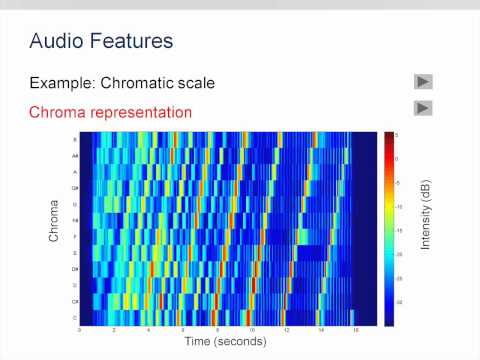

In [8]:
import IPython.display as ipd
ipd.display(ipd.YouTubeVideo('PF05xP1NqUM', width=600, height=450))

The following YouTube video gives an introduction to tempo and beat tracking, a topic covered in Chapter 6 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015].</a>

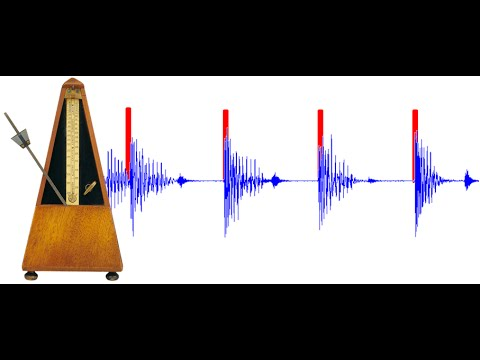

In [9]:
ipd.display(ipd.YouTubeVideo('FmwpkdcAXl0', width=600, height=450))

### Video: Formats and Conversion

There are multitude ways of encoding videos, and there is **no** answer to the question of the **best** video format. The suitability of a video format depends on the application in mind, the digital platform used, the bandwidth available (e.g., when distributing a video file), and many other software and hardware constraints. Another source of confusion is that the term **video format** is often used to refer to two different components called codecs and containers. 

A **codec** is a component that compresses a video file to make it more manageable in terms of storage requirements. There are many different codecs including the `x264` codec (used for the H.264 or MPEG-4 Part 10 standard), which is one of the most commonly used formats for the recording, compression, and distribution of video content.

A **container** can be thought of a set of media files, typically also comprising a video codec, an audio codec, and additional data such as subtitles, lyrics, and other metadata. Important container (or video formats) are for example:


* `AVI`: Most popular format in the past; Microsoft replaced AVI by WMV; wide compatibility with both PC and Mac system.
* `WMV`: Designed for streaming applications.
* `MOV`: Designed for long videos (such as movies); Apple; compatible with Macintosh and Windows. platforms
* `MP4`: Widely supported; used in iTunes and other popular products.

Similarly, there are countless tools for processing video files. One of the leading multimedia frameworks currently available is [FFmpeg](https://www.ffmpeg.org/), which offers cross-platform solutions for recording, converting, and streaming audio and video. We refer to the [website of FFmpeg](https://www.ffmpeg.org/) for a detailed description of options. Just to give an example, the following command was used to compress, convert, and rescale the video of the Interpretation Switcher shown above:

<div class="alert alert-block alert-warning">
    <tt>ffmpeg -i FMP_InterpretationSwitcher.avi -c:v libx264 -preset slow -crf 22 -vf scale=480:-1 FMP_InterpretationSwitcher_small.mp4</tt>
</div> 

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow">Frank Zalkow</a> and <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div>

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>